# Dataset imports (don't edit)

In [ ]:
# basic imports for libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# model imports
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# evaluation and training imports
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# preprocessing imports
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
# install required package
!pip install ucimlrepo

In [ ]:
# import additional requirements
from ucimlrepo import fetch_ucirepo
import os

In [ ]:
# create data folder
if not os.path.exists('data'):
    os.makedirs('data')

In [ ]:
# fetch iris dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X_iris = iris.data.features
y_iris = iris.data.targets

In [ ]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X_mushroom = mushroom.data.features
y_mushroom = mushroom.data.targets

# drop stalk_root as it contains missing values
X_mushroom = X_mushroom.drop(columns=["stalk-root"])

In [ ]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X_adult = adult.data.features
y_adult = adult.data.targets

# minor preprocessing for the target (classes should only be <=50k and >50k)
y_adult['income'] = y_adult['income'].map({"<=50K.": "<=50K", ">50K.": ">50K",
                                           "<=50K": "<=50K", ">50K": ">50K"})

# drop problematic columns, repetitive columnds and ID column
X_adult = X_adult.drop(columns=["race", "fnlwgt", "education-num", "sex"])

# ensure all null values as represented as NaN
X_adult = X_adult.replace("?", np.nan)

<ipython-input-7-8770d1dddcdf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_adult['income'] = y_adult['income'].map({"<=50K.": "<=50K", ">50K.": ">50K",


Create dataframes that include both features and targets

In [ ]:
# Create dataset for both features and targets
iris_data = pd.concat([X_iris, y_iris], axis=1)

In [ ]:
# Create dataset for both features and targets
mushroom_data = pd.concat([X_mushroom, y_mushroom], axis=1)

In [ ]:
# Create dataset for both features and targets
adult_data = pd.concat([X_adult, y_adult], axis=1)

In [ ]:
# This function takes a results variable of format results["model"] = metric, and the metric you are measuring as a string
def plot_metrics(results, metric):
  df = pd.DataFrame(list(results.items()), columns=["Model", metric])
  plt.figure(figsize=(8, 5))
  plt.plot(df["Model"], df[metric], marker="o", color="skyblue", linestyle="-")
  plt.title("Model Comparison")
  plt.xlabel("Model")
  plt.ylabel("Accuracy")
  plt.ylim(0.5, 1)  # Assuming accuracy is between 0.5 and 1
  plt.xticks(rotation=45)
  plt.tight_layout()

  # Show the plot
  plt.show()

# Iris Data

In [ ]:
iris_data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


This dataset has:
- four numerical features: sepal length and width, and petal length and width
- the target variable the model is trying to predict called "class", which can be one of three species

The numerical features are quite small, so the model already performs quite well:

In [ ]:
# Test a simple linear model for iris data
model = LogisticRegression(C=0.01)

# X contains all of the features (independent variables)
X = iris_data.drop(columns=["class"])

# y contains the target variable that we want to predict
y = iris_data["class"]

model.fit(X, y)

score = model.score(X, y)

score

# We did something wrong in this cell! Bonus points to you if you can identify what it is and tell an instructor.
# We know this is wrong - we're going to do this very bad thing a couple times in this file because we don't have enough data to do it the correct way.
# We do it correctly in the last example though!

0.8733333333333333

We can compare our results easily by storing each models performance in a table:

In [ ]:
results = {}

results["No scaling"] = score

pd.DataFrame([results])

,No scaling
0,0.873333


## Scaling

Let's see how scaling the data impacts the model's score

### Min Max Scaler

In [ ]:
transformer = MinMaxScaler()

X_scaled = transformer.fit_transform(X)

In [ ]:
print(X_scaled)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

Now let's compare the original X data to the transformed X data:

In [ ]:
print(X)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


These look extremely different, X_scaled is a list of items whereas X is a dataframe (table). Lets convert X_scaled to the correct format

In [ ]:
# transform data and add column names from X
X_scaled = pd.DataFrame(X_scaled, columns=X.columns.to_list())
X_scaled

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


We now have X_scaled in the same format, so let's train our model again

In [ ]:
# Test a simple linear model for min max scaler transformed iris data
# use Logistic Regression with C = 0.01
# your code here!
# transformed_model = ...

# fit and score your model! make sure to use X_scaled instead of X
# your code here...
# new_score = ...

In [ ]:
# Record the score for min max scaler
results["Min max scaling"] = new_score

pd.DataFrame([results])

,No scaling,Min max scaling
0,0.873333,0.786667


This actually made our model worse, so we can try again with a different scaler:

### Standard Scaler

In [ ]:
new_transformer = StandardScaler()

# transform the data, scaling it based off of values from X
X_second_scaled = new_transformer.fit_transform(X)

# format the scaled data to include the correct feature names
X_second_scaled = pd.DataFrame(X_second_scaled, columns=X.columns.to_list())

In [ ]:
# Test a simple linear model for standard scaler transformed iris data
# use Logistic Regression with C = 0.01
# your code here!
# second_transformed_model = ...

# fit and score your model! make sure to use X_second_scaled instead of X
# your code here...
# last_score = ...

In [ ]:
# Record the new score in the same results table
results["Standard scaling"] = last_score

pd.DataFrame([results])

,No scaling,Min max scaling,Standard scaling
0,0.873333,0.786667,0.88


We got better results with scaling! This difference would be even more obvious with data that is more spread apart.

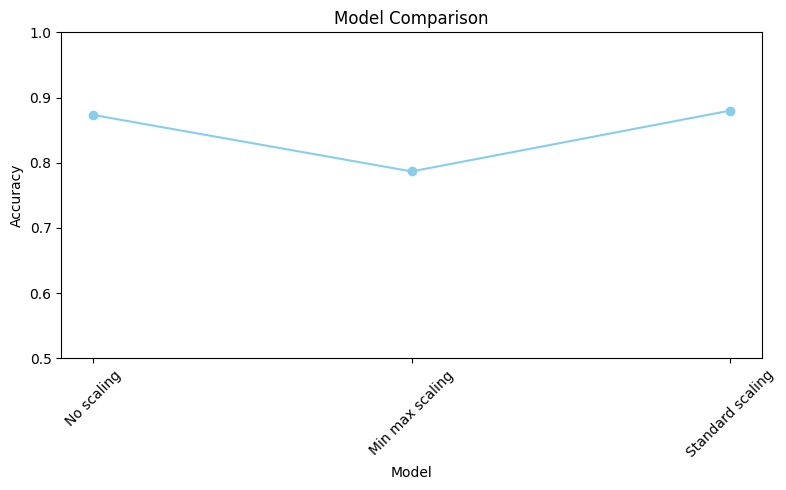

In [ ]:
plot_metrics(results, "accuracy")

# Mushroom Data

In [ ]:
mushroom_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


This dataset has:
- 21 categorical features
- the target variable the model is trying to predict called "poisonous", which can have one of 2 values: "e" (edible) or "p" (poisonous)

Since all features are categorical, we know that no scaling is needed. Let's see if our linear model works without any preprocessing:

In [ ]:
# Test a simple linear model for iris data
# use Logistic Regression with C = 0.01
# your code here!
# model = ...

X = mushroom_data.drop(columns=["poisonous"])
y = mushroom_data["poisonous"]

# fit your model!
# your code here...

ValueError: could not convert string to float: 'x'

This doesn't work!! Our model doesn't know how to interpret strings, so we need to convert them to numbers. Let's test different ways to do that:

## Ordinal Encoding

In [ ]:
transformer = OrdinalEncoder()

X_ordinal_encoded = transformer.fit_transform(X)

# Convert X_ordinal_encoded into the same format as X, as we did for scaling
X_ordinal_encoded = pd.DataFrame(X_ordinal_encoded, columns=X.columns.to_list())

X_ordinal_encoded

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


Each of the categories in every column is now represented by a number!

In [ ]:
# use Logistic Regression with max_iter=1000
# max_iter is a new hyperparameter: set a maximum number of iterations to help the linear model find the correct line
# your code here!
# ordinal_model = ...

# fit and score your model! make sure to use X_ordinal_encoded instead of X
# your code here...
# ordinal_score = ...

In [ ]:
results = {}

results["ordinal encoding"] = ordinal_score

pd.DataFrame([results])

,ordinal encoding
0,0.946332


There are some issues with this form of encoding. By converting all of the categories into their own number, starting from 0 to the number categories needed, we are telling the ML model that the categories have some sort of order to them.

In [ ]:
X["veil-color"]

# From the dataset description, we are told that: brown=n, orange=o, white=w, yellow=y

,veil-color
0,w
1,w
2,w
3,w
4,w
...,...
8119,o
8120,n
8121,o
8122,w


In [ ]:
X_ordinal_encoded["veil-color"]

# It seems from this encoding that brown=0.0, orange=1.0, white=2.0, yellow=3.0 (not visible)

,veil-color
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
8119,1.0
8120,0.0
8121,1.0
8122,2.0


This encoding tells the model that the examples with brown colours are more closely related to the examples with orange colour, and less related to the examples with yellow colour, but this **isn't necessarily accurate**. Therefore we need another way to encode the data:

## One-Hot Encoding

Instead of assigning each category in a column to a new number, we're giving each category it's own **column**. Let's look at this transformation for the *veil-color* column.

In [ ]:
X["veil-color"]

,veil-color
0,w
1,w
2,w
3,w
4,w
...,...
8119,o
8120,n
8121,o
8122,w


In [ ]:
transformer = OneHotEncoder(sparse_output=False)

X_column = pd.DataFrame(X["veil-color"])

X_column_ohe_encoded = transformer.fit_transform(X_column)

pd.DataFrame(X_column_ohe_encoded)

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
8119,0.0,1.0,0.0,0.0
8120,1.0,0.0,0.0,0.0
8121,0.0,1.0,0.0,0.0
8122,0.0,0.0,1.0,0.0


In this encoding, brown=column 0, orange=column 1, white=column 2, yellow=column 3. Each column represents its own category, and if an example is in that category you'll see a 1 in that column, otherwise it'll be a 0. This takes out the relationship between the categories, and lets the model find its own patterns.

You may notice that these columns don't have descriptive names, so we can assign them new names the following way:

In [ ]:
X_column_ohe_encoded = pd.DataFrame(X_column_ohe_encoded,
                                    columns=transformer.get_feature_names_out())

X_column_ohe_encoded

,veil-color_n,veil-color_o,veil-color_w,veil-color_y
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
8119,0.0,1.0,0.0,0.0
8120,1.0,0.0,0.0,0.0
8121,0.0,1.0,0.0,0.0
8122,0.0,0.0,1.0,0.0


In [ ]:
# apply one hot encoding (ohe) to all the features and train the model

transformer = OneHotEncoder(sparse_output=False)

X_ohe_encoded = transformer.fit_transform(X)

X_ohe_encoded = pd.DataFrame(X_ohe_encoded,
                             columns=transformer.get_feature_names_out())

In [ ]:
# use Logistic Regression with max_iter=1000
# your code here!
# ohe_model = ...

# fit and score your model! make sure to use X_ohe_encoded instead of X
# your code here...
# ohe_score = ...

# store the results in a table with the ordinal results
results["one hot encoding"] = ohe_score

pd.DataFrame([results])

,ordinal encoding,one hot encoding
0,0.946332,1.0


Now it's performing incredibly well!

# Train and Testing Data

All of the examples of preprocessing we saw today were applied on the whole dataset, to simplify it. But when we have training and testing data, we can't follow the same steps as this would violate the **golden rule** of machine learning.

**The Golden Rule:** The test data cannot influence training the model in any way.

So the following steps would break the golden rule, as we are fitting the transformer/ scaler to the whole dataset (training and testing data combined), so the transformations applied are based on the testing data as well as the training data:


```
X_transformed = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed)

model.fit(X_train, y_train)

model.score(X_test, y_test)

```



The solution: fit the transformer the to **training data** only, then transform the testing data using the fitted transformer:


```
X_train, X_test, y_train, y_test = train_test_split(X_transformed)

X_train_transformed = scaler.fit_transform(X_train)

X_test_transformed = scaler.transform(X_test)

model.fit(X_train_transformed, y_train)

model.score(X_test_transformed, y_test)
```

# Final Example: Census Data

In [ ]:
adult_data

,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,0,0,36,United-States,<=50K
48838,64,NaN,HS-grad,Widowed,NaN,Other-relative,0,0,40,United-States,<=50K
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,0,0,50,United-States,<=50K
48840,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,5455,0,40,United-States,<=50K


This dataset has the target variable "income", that can take one of two values: <=50k or >50k.

It also includes a mix of numerical and categorical features, and may have missing values. We can check for missing values by doing the following:

In [ ]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   capital-gain    48842 non-null  int64 
 7   capital-loss    48842 non-null  int64 
 8   hours-per-week  48842 non-null  int64 
 9   native-country  47985 non-null  object
 10  income          48842 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


There are 48842 rows in total, so if the features contained all the values then the non-null count (null meaning missing) would be 48842. We can see that **workclass**, **occupation**, and **native-country** all have missing values as their counts are below 48842.

As a result, we have 4 different transformations we may need to do: Imputing (replacing missing values), Scaling numerical data, Ordinal encoding for categorical data, and one hot encoding for categorical data.

In [ ]:
# for each type of data, add the names of the columns to the appropriate list
# for example...
ordinal_columns = ["education"]

# your code here!
# numerical_columns = [...]
# categorical_columns = [...]

To use ordinal encoding on actual ordinal categories (categories with an order), we want to specify the correct order. To do this, we need to find out what categories are possible for the education feature.

In [ ]:
adult_data["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

Now we can sort the orders from lowest to highest level of education.

In [ ]:
ordered_categories = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

In [ ]:
# First step: separate the data into training and testing
X = adult_data.drop(columns=["income"])
y = adult_data["income"]

# split the data into a larger test size to reduce time to train our models (given how large the dataset is)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

To encode different column types at the same time, we can use a **Column Transformer**, which takes a list of columns and the transformers that you want to apply to the columns eg. StandardScaler(). To apply multiple transformations in a row, you can use make_pipeline(), with the transformations in order.



In [ ]:
# Step two: make the column transformer

# fill in the blanks with one of these transformers:
# SimpleImputer(strategy='most_frequent')
# StandardScaler()
# OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# OrdinalEncoder(categories=[ordered_categories], dtype=int)

# there will be errors until you complete this step! this is normal!

preprocessor = make_column_transformer(
    (# ...
     , numerical_columns),
    (make_pipeline(# ...
                   , # ...
                  ), categorical_columns),
    (# ...
     , ordinal_columns)
)

SyntaxError: incomplete input (ipython-input-1-1798858652.py, line 18)

In [ ]:
# Step three: apply the transformations as you would any other transformer

# make sure to fit_transform or transform as appropriate and use the right data (remember the golden rule!)
# your code here!
# X_train_encoded = ...
# X_test_encoded = ...

In [ ]:
# Step four: train and test a linear model
# use Logistic Regression with max_iter=1000
# your code here!
# linear_model = ...

# fit and score your model! make sure to use X_train_encoded/X_test_encoded instead of X
# your code here...

0.8493823790350099

The model is performing quite well after preprocessing! With fine-tuning of hyperparameters we could get it to perform even better!